# Author : Shaurya Uniyal

# GRIP @ Sparks Foundation

# Task 1: Predict the percentage of student based on the number of study hours using supervised ML.(Level- Beginner)

In [1]:
#importing the pre-required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

In [2]:
# Data input
url="http://bit.ly/w-data"
data =pd.read_csv(url)
print("Data has been imported\n")

data.head(10)

Data has been imported



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#more information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


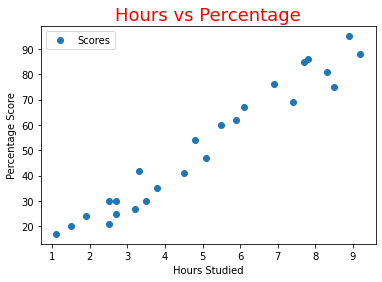

In [4]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', size=18, color="Red")  
plt.xlabel('Hours Studied', size=10)  
plt.ylabel('Percentage Score', size=10)  
plt.show()

This graph shows a positive linear relation between the number of hours studied and score.

In [5]:
#data preprocessing
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [6]:
#Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor= LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training has been completed.")

Training has been completed.


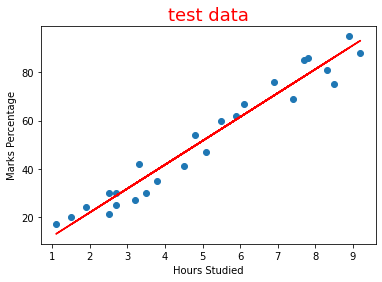

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='Red');
plt.title('test data', size=18, color="Red")
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

In [8]:
#Prediction
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("\nTest Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552

Test Score: 0.9454906892105355


In [11]:
#task:What will be the predicted score of a student if he studies 9.25 hours in a day?
hr = 9.25
test = np.array([hr])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("If a student studies for {} hours in a day then he will get a score of {}".format(hr,own_pred[0]))

If a student studies for 9.25 hours in a day then he will get a score of 93.69173248737535


In [12]:
#Evaluting accuracy of our model
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nR-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975

Mean Squared Error: 21.598769307217406

Root Mean Squared Error: 4.647447612100367

R-2: 0.9454906892105355
